In [131]:
import sys
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from scipy.special import comb
from scipy.stats import spearmanr

In [132]:
data=pd.read_csv('data.csv', index_col=0)

In [176]:
col = data.columns[:len(data.columns)-3]
income = data.columns[-1]

## Data Summary

In [177]:
summary = data.describe()
summary

,Adventure Market Share,Action Market Share,Drama Market Share,Comedy Market Share,Thriller-or-Suspense Market Share,Horror Market Share,Romantic-Comedy Market Share,Musical Market Share,Other Genres Market Share,Total Tickets,GDP % Growth,"% Income Annual Change, Chained Dollars"
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,2.400000e+01,24.000000,24.000000
mean,0.260167,0.195875,0.167708,0.155517,0.081979,0.048904,0.047208,0.016596,0.026046,1.374503e+09,2.475729,2.833333
std,0.052722,0.056355,0.043889,0.042384,0.024037,0.017981,0.024026,0.017037,0.009205,9.117192e+07,1.590986,1.551344
min,0.138000,0.114000,0.111000,0.071300,0.041600,0.019500,0.006600,0.000000,0.005000,1.221690e+09,-2.536800,-1.300000
25%,0.242500,0.157500,0.134750,0.125000,0.063300,0.033250,0.029600,0.006250,0.020175,1.309371e+09,1.817000,2.225000
50%,0.266500,0.194000,0.161000,0.147000,0.080950,0.048000,0.049850,0.011100,0.026800,1.377161e+09,2.624050,3.100000
75%,0.296750,0.223750,0.185750,0.195250,0.095125,0.061250,0.062850,0.022700,0.029725,1.425984e+09,3.578025,3.775000
max,0.369000,0.341000,0.287000,0.214000,0.146000,0.094500,0.098400,0.080900,0.045400,1.575755e+09,4.753200,5.900000


In [178]:
stats = pd.DataFrame()
for c in col:
    stats[c]=[summary[c][5],summary[c][1],summary[c][2]]
stats[income]=[summary[c][5],summary[c][1],summary[c][2]]
stats.index = ['Med','Mean', 'StDev']

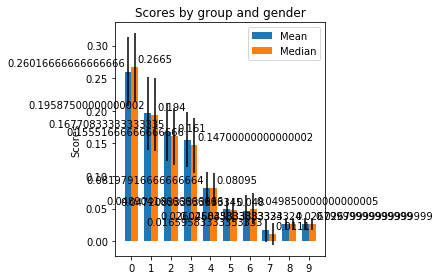

In [186]:
means =stats.loc['Mean']
stdev = stats.loc['StDev']
med = stats.loc['Med']

ind = np.arange(10)  # the x locations for the groups
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind - width/2, means, width, yerr=stdev, label='Mean')
rects2 = ax.bar(ind + width/2, med, width, yerr=stdev, label='Median')



ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(ind)
#ax.set_xticklabels(('G1', 'G2', 'G3', 'G4', 'G5'))
ax.legend()


def autolabel(rects, xpos='center'):
    """
    Attach a text label above each bar in *rects*, displaying its height.

    *xpos* indicates which side to place the text w.r.t. the center of
    the bar. It can be one of the following {'center', 'right', 'left'}.
    """

    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0, 'right': 1, 'left': -1}

    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(offset[xpos]*3, 3),  # use 3 points offset
                    textcoords="offset points",  # in both directions
                    ha=ha[xpos], va='bottom')


autolabel(rects1, "left")
autolabel(rects2, "right")

fig.tight_layout()





plt.show()

**Observations**: The mean and the meadian for each genre is relatively close in value, while the standard deviations are pretty small. This indicates low variation. However, income change has a large standard deviation.

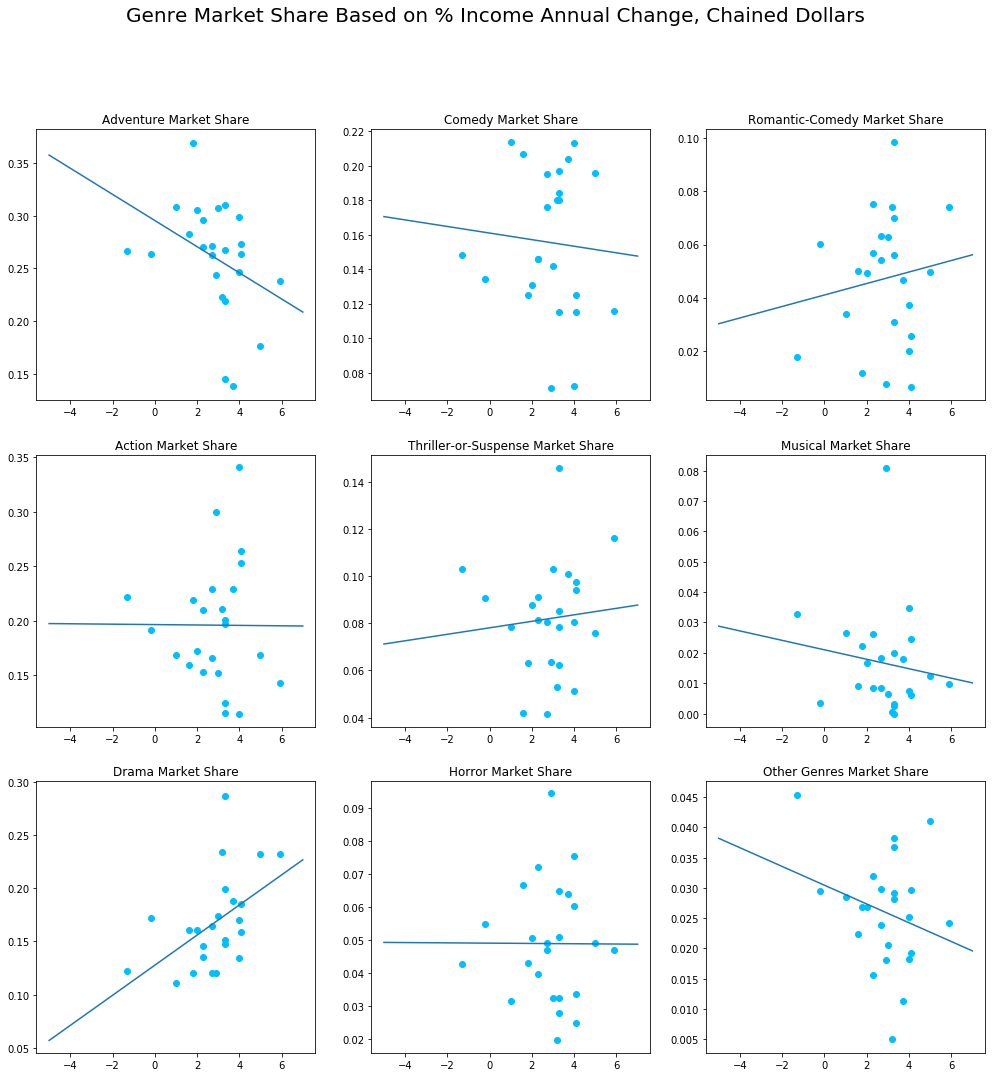

In [46]:
xaxs = 0
yaxs = 0

fig, axs = plt.subplots(3, 3, figsize=(17, 17))
fig.suptitle('Genre Market Share Based on ' + income, fontsize=20)

for c in col:
    #CREATING THE LINE OF BEST FIT
    model = LinearRegression().fit(data[[income]], data[c])
    score= model.coef_[0]
    intercept=model.intercept_
    x = np.linspace(-5,7,100)
    y = score*x+intercept
    axs[xaxs, yaxs].plot(x, y)
    
    

    #CREATING THE SCATTERPLOT
    axs[xaxs, yaxs].scatter(data[income], data[c], color = 'deepskyblue')
    axs[xaxs, yaxs].set_title(c)
    #axs[xaxs, yaxs].set_xlabel(income)
    #axs[xaxs, yaxs].set_ylabel(c)
    xaxs +=1
    if xaxs == 3:
        xaxs = 0
        yaxs +=1

plt.show()

In [57]:
for c in col:
    #CREATING THE LINE OF BEST FIT
    model = LinearRegression().fit(data[[income]], data[c])
    print(c, ':', '{:.3f}'.format((model.score(data[[income]], data[c])**(1/2))))

Adventure Market Share : 0.365
Action Market Share : 0.005
Drama Market Share : 0.500
Comedy Market Share : 0.070
Thriller-or-Suspense Market Share : 0.089
Horror Market Share : 0.004
Romantic-Comedy Market Share : 0.139
Musical Market Share : 0.142
Other Genres Market Share : 0.261


In [56]:
for c in col:    
    r = spearmanr(data[income],data[c])
    spearman_r=r.correlation
    print(c,':', '{:.3f}'.format(spearman_r))

Adventure Market Share : -0.439
Action Market Share : 0.011
Drama Market Share : 0.526
Comedy Market Share : -0.143
Thriller-or-Suspense Market Share : 0.151
Horror Market Share : -0.037
Romantic-Comedy Market Share : -0.016
Musical Market Share : -0.186
Other Genres Market Share : -0.117

Adventure Market Share : 0.192
Action Market Share : 0.000
Drama Market Share : 0.276
Comedy Market Share : 0.020
Thriller-or-Suspense Market Share : 0.023
Horror Market Share : 0.001
Romantic-Comedy Market Share : 0.000
Musical Market Share : 0.035
Other Genres Market Share : 0.014


In [ ]:
slope = numpy.sum((x - mean_x) * (y - mean_y)) / numpy.sum((y - mean_y)**2)
intercept = mean_x - slope * mean_y
predicted_x = y * slope + intercept
residuals = x - predicted_x
residual_std = numpy.sqrt(numpy.sum((residuals - residuals.mean())**2) / n)


In [71]:
change = pd.DataFrame({income: data[income]})
for c in col:
    change[c]=data[c].diff()
change=change[1:]


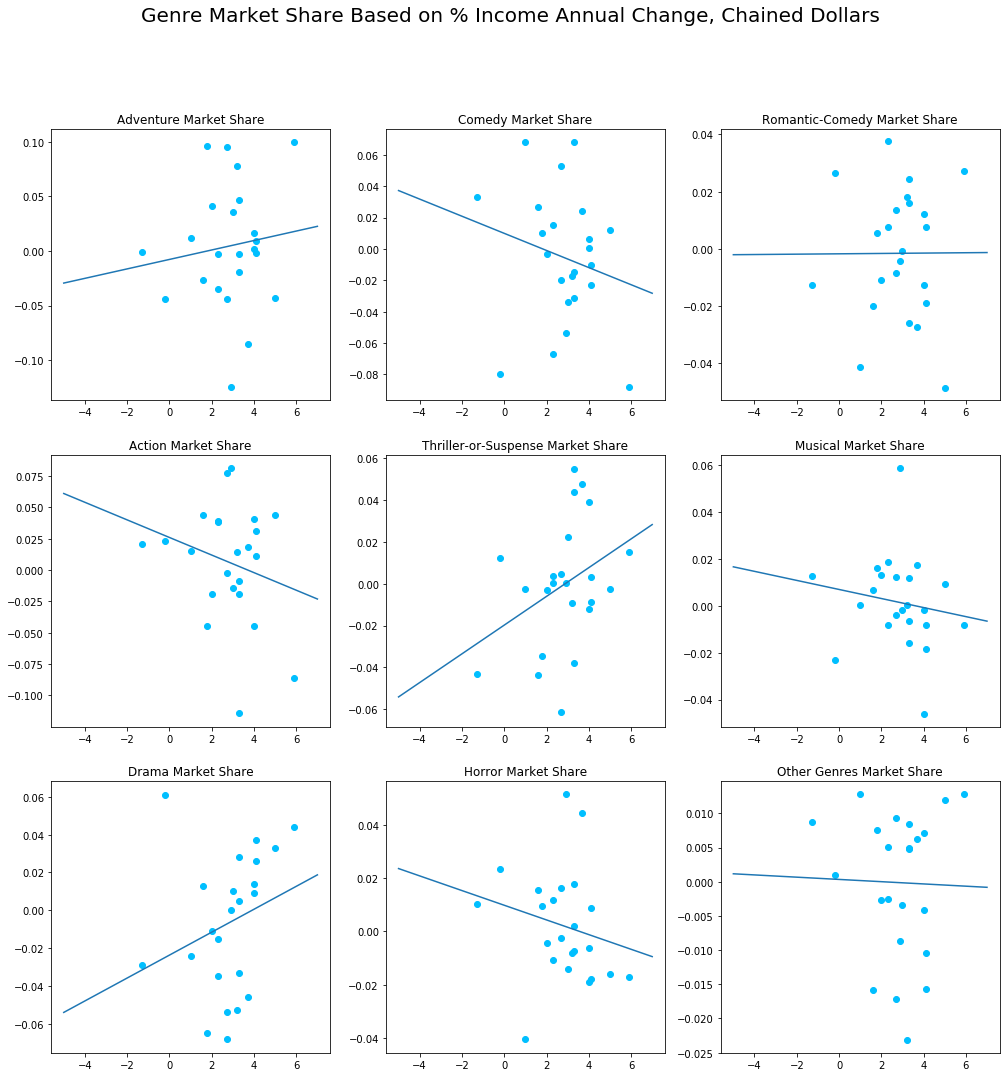

In [72]:
xaxs = 0
yaxs = 0

fig, axs = plt.subplots(3, 3, figsize=(17, 17))
fig.suptitle('Genre Market Share Based on ' + income, fontsize=20)

for c in col:
    #CREATING THE LINE OF BEST FIT
    model = LinearRegression().fit(change[[income]], change[c])
    score= model.coef_[0]
    intercept=model.intercept_
    x = np.linspace(-5,7,100)
    y = score*x+intercept
    axs[xaxs, yaxs].plot(x, y)
    
    

    #CREATING THE SCATTERPLOT
    axs[xaxs, yaxs].scatter(change[income], change[c], color = 'deepskyblue')
    axs[xaxs, yaxs].set_title(c)
    #axs[xaxs, yaxs].set_xlabel(income)
    #axs[xaxs, yaxs].set_ylabel(c)
    xaxs +=1
    if xaxs == 3:
        xaxs = 0
        yaxs +=1

plt.show()

In [118]:
for c in col:    
    r = spearmanr(data[income],data[c])
    sr=r.correlation   
    changer = spearmanr(change[income],change[c])
    changesr=changer.correlation
    spearman_r=changesr-sr
    print(c)
    if sr>changesr:
        print('sr')
    if changesr>sr:
        print('changesr')
    if sr==changesr:
        print('hi')

Adventure Market Share
changesr
Action Market Share
sr
Drama Market Share
sr
Comedy Market Share
sr
Thriller-or-Suspense Market Share
changesr
Horror Market Share
sr
Romantic-Comedy Market Share
changesr
Musical Market Share
sr
Other Genres Market Share
changesr
